## Imports, Helpers, Parameters

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from textwrap import wrap
import numpy as np
import os

palette = sns.color_palette("colorblind")
# Put once at the TOP of your notebook/script (or just tweak this line)
sns.set_context("notebook", font_scale=1.0)  # was 1.2; smaller = less crowded


## Set Up Data Frames

### Create New Pct Values In Main Data

In [51]:

main_df = pd.read_csv("../data/tasks_final.csv")

claude_userbase_bias = True

if not claude_userbase_bias:
    mask = main_df["major_occ_category"] == "Computer and Mathematical Occupations"
    main_df.loc[mask, "pct_normalized"] = 0
    main_df["pct_normalized"] = (main_df["pct_normalized"] / main_df["pct_normalized"].sum()) * 100

# Create frequency adjusted pct
main_df[f"pct_freq_div_{2015}"] = ((main_df["pct_normalized"]/main_df[f"freq_mean_{2015}"]) / (main_df["pct_normalized"]/main_df[f"freq_mean_{2015}"]).sum()) * 100
main_df[f"pct_freq_div_{2025}"] = ((main_df["pct_normalized"]/main_df[f"freq_mean_{2025}"]) / (main_df["pct_normalized"]/main_df[f"freq_mean_{2025}"]).sum()) * 100

# Create freq nat emp adjusted pct
main_df[f"pct_freq_nat_emp_div_{2015}"] = (((main_df["pct_normalized"]/main_df[f"freq_mean_{2015}"])/main_df[f"emp_tot_nat_{2015}"]) / ((main_df["pct_normalized"]/main_df[f"freq_mean_{2015}"])/main_df[f"emp_tot_nat_{2015}"]).sum()) * 100
main_df[f"pct_freq_nat_emp_div_{2024}"] = (((main_df["pct_normalized"]/main_df[f"freq_mean_{2025}"])/main_df[f"emp_tot_nat_{2024}"]) / ((main_df["pct_normalized"]/main_df[f"freq_mean_{2025}"])/main_df[f"emp_tot_nat_{2024}"]).sum()) * 100

# Create freq ut emp adjusted pct
main_df[f"pct_freq_ut_emp_div_{2015}"] = (((main_df["pct_normalized"]/main_df[f"freq_mean_{2015}"])/main_df[f"emp_tot_ut_{2015}"]) / ((main_df["pct_normalized"]/main_df[f"freq_mean_{2015}"])/main_df[f"emp_tot_ut_{2015}"]).sum()) * 100
main_df[f"pct_freq_ut_emp_div_{2024}"] = (((main_df["pct_normalized"]/main_df[f"freq_mean_{2025}"])/main_df[f"emp_tot_ut_{2024}"]) / ((main_df["pct_normalized"]/main_df[f"freq_mean_{2025}"])/main_df[f"emp_tot_ut_{2024}"]).sum()) * 100



### Create Comp Pcts In Main Data

In [52]:
#2015
# Create comp column to pct_normalized by multiplying by freq and emp
main_df["pct_claude_freq_nat_emp_2015"] = ((main_df["freq_mean_2015"] * main_df["emp_tot_nat_2015"]) / 
                                      (main_df["freq_mean_2015"] * main_df["emp_tot_nat_2015"]).sum()) * 100
main_df["pct_claude_freq_ut_emp_2015"] = ((main_df["freq_mean_2015"] * main_df["emp_tot_ut_2015"]) / 
                                     (main_df["freq_mean_2015"] * main_df["emp_tot_ut_2015"]).sum()) * 100

# Create comp column to pct_freq_div by only using emp
main_df["pct_claude_nat_emp_2015"] = ((main_df["emp_tot_nat_2015"]) / 
                                 (main_df["emp_tot_nat_2015"]).sum()) * 100
main_df["pct_claude_ut_emp_2015"] = ((main_df["emp_tot_ut_2015"]) / 
                                (main_df["emp_tot_ut_2015"]).sum()) * 100


#2024
# Create comp column to pct_normalized by multiplying by freq and emp
main_df["pct_claude_freq_nat_emp_2024"] = ((main_df["freq_mean_2025"] * main_df["emp_tot_nat_2024"]) / 
                                      (main_df["freq_mean_2025"] * main_df["emp_tot_nat_2024"]).sum()) * 100
main_df["pct_claude_freq_ut_emp_2024"] = ((main_df["freq_mean_2025"] * main_df["emp_tot_ut_2024"]) / 
                                     (main_df["freq_mean_2025"] * main_df["emp_tot_ut_2024"]).sum()) * 100

# Create comp column to pct_freq_div by only using emp
main_df["pct_claude_nat_emp_2024"] = ((main_df["emp_tot_nat_2024"]) / 
                                 (main_df["emp_tot_nat_2024"]).sum()) * 100
main_df["pct_claude_ut_emp_2024"] = ((main_df["emp_tot_ut_2024"]) / 
                                (main_df["emp_tot_ut_2024"]).sum()) * 100


# Create comp column to pct_freq_nat_emp_div by have a base pct for each task
main_df["pct_claude_base_dist"] = (((1 / main_df["task_normalized"].nunique()) / (main_df["n_occurrences"])) /
                       ((1 / main_df["task_normalized"].nunique()) / (main_df["n_occurrences"])).sum()) * 100


### Create Compt Pcts & Task Type In Eco Data Frame

In [53]:
# eco 2015 df
eco_df_2015 = pd.read_csv("../data/ratings_eco_2015.csv")

# Create comp column to pct_normalized by multiplying by freq and emp
eco_df_2015["pct_eco_freq_nat_emp_2015"] = ((eco_df_2015["freq_mean"] * eco_df_2015["tot_emp_nat"]) / 
                                            (eco_df_2015["freq_mean"] * eco_df_2015["tot_emp_nat"]).sum()) * 100
eco_df_2015["pct_eco_freq_ut_emp_2015"] = ((eco_df_2015["freq_mean"] * eco_df_2015["tot_emp_ut"]) / 
                                           (eco_df_2015["freq_mean"] * eco_df_2015["tot_emp_ut"]).sum()) * 100

# Create comp column to pct_freq_div by only using emp
eco_df_2015["pct_eco_nat_emp_2015"] = ((eco_df_2015["tot_emp_nat"]) / 
                                            (eco_df_2015["tot_emp_nat"]).sum()) * 100
eco_df_2015["pct_eco_ut_emp_2015"] = ((eco_df_2015["tot_emp_ut"]) / 
                                           (eco_df_2015["tot_emp_ut"]).sum()) * 100

# Create comp column to pct_freq_nat_emp_div by have a base pct for each task
eco_df_2015["task_counts"] = eco_df_2015.groupby("task_normalized")["task_normalized"].transform("count")
eco_df_2015["pct_base_dist"] = (((1 / eco_df_2015["task_normalized"].nunique()) / (eco_df_2015["task_counts"])) /
                                ((1 / eco_df_2015["task_normalized"].nunique()) / (eco_df_2015["task_counts"])).sum()) * 100
eco_df_2015["pct_eco_base_dist"] = 1 / eco_df_2015["task_normalized"].nunique()


# eco 2015 df
eco_df_2025 = pd.read_csv("../data/ratings_eco_2025.csv")

# Create comp column to pct_normalized by multiplying by freq and emp
eco_df_2025["pct_eco_freq_nat_emp_2024"] = ((eco_df_2025["freq_mean"] * eco_df_2025["tot_emp_nat"]) / 
                                            (eco_df_2025["freq_mean"] * eco_df_2025["tot_emp_nat"]).sum()) * 100
eco_df_2025["pct_eco_freq_ut_emp_2024"] = ((eco_df_2025["freq_mean"] * eco_df_2025["tot_emp_ut"]) / 
                                           (eco_df_2025["freq_mean"] * eco_df_2025["tot_emp_ut"]).sum()) * 100

# Create comp column to pct_freq_div by only using emp
eco_df_2025["pct_eco_nat_emp_2024"] = ((eco_df_2025["tot_emp_nat"]) / 
                                            (eco_df_2025["tot_emp_nat"]).sum()) * 100
eco_df_2025["pct_eco_ut_emp_2024"] = ((eco_df_2025["tot_emp_ut"]) / 
                                           (eco_df_2025["tot_emp_ut"]).sum()) * 100

# Create comp column to pct_freq_nat_emp_div by have a base pct for each task
eco_df_2025["task_counts"] = eco_df_2025.groupby("task_normalized")["task_normalized"].transform("count")
eco_df_2025["pct_eco_base_dist"] = (((1 / eco_df_2025["task_normalized"].nunique()) / (eco_df_2025["task_counts"])) /
                                ((1 / eco_df_2025["task_normalized"].nunique()) / (eco_df_2025["task_counts"])).sum()) * 10



def classify_task_type(df):
    """
    Adds a 'task_type' column based on relevance and importance.
    Core: relevance >= 67 AND importance >= 3.0
    Supplemental: everything else
    """
    conditions = [
        (df["relevance"] >= 67) & (df["importance"] >= 3.0),   # Core
    ]
    choices = ["Core"]

    df["task_type"] = np.select(conditions, choices, default="Supplemental")
    return df

# Apply to both
eco_df_2015 = classify_task_type(eco_df_2015)
eco_df_2025 = classify_task_type(eco_df_2025)

# We need to merge the baseline data from the main_df into the eco_df dataframes so our logic in our main 
# loop can use the same df.
eco_df_2015 = eco_df_2015.merge(main_df[["task_normalized", "pct_claude_base_dist"]].drop_duplicates(), 
                                on="task_normalized", how="left")

eco_df_2025 = eco_df_2025.merge(main_df[["task_normalized", "pct_claude_base_dist"]].drop_duplicates(), 
                                on="task_normalized", how="left")

### Loop List and Dict Creation

In [54]:
pcts = ["pct_normalized","pct_freq_div_2015", "pct_freq_div_2025","pct_freq_nat_emp_div_2015", "pct_freq_nat_emp_div_2024",
        "pct_freq_ut_emp_div_2015", "pct_freq_ut_emp_div_2024"]
task_types = ["All", "Core", "Supplemental"]

econ_map = {
    "pct_normalized": {
        "eco_comp_2015": [
            ("eco_df_2015", "pct_eco_freq_nat_emp_2015", "Nat 2015"),
            ("eco_df_2015", "pct_eco_freq_ut_emp_2015", "UT 2015"),
        ],
        "eco_comp_2024": [
            ("eco_df_2025", "pct_eco_freq_nat_emp_2024", "Nat 2024"),
            ("eco_df_2025", "pct_eco_freq_ut_emp_2024", "UT 2024"),
        ],
        "aei_comp_2024": [
            ("main_df", "pct_claude_freq_nat_emp_2024", "Nat AEI 2024"),
            ("main_df", "pct_claude_freq_ut_emp_2024", "UT AEI 2024"),
        ],
        "aei_comp_2015": [
            ("main_df", "pct_claude_freq_nat_emp_2015", "Nat AEI 2015"),
            ("main_df", "pct_claude_freq_ut_emp_2015", "UT AEI 2015"),
        ]
    },
    "pct_freq_div_2015": {
        "eco_comp_2015": [
            ("eco_df_2015", "pct_eco_nat_emp_2015", "Nat 2015"),
            ("eco_df_2015", "pct_eco_ut_emp_2015", "UT 2015"),
        ],
        "aei_comp_2015": [
            ("main_df", "pct_claude_nat_emp_2015", "Nat AEI 2015"),
            ("main_df", "pct_claude_ut_emp_2015", "UT AEI 2015"),
        ],
    },
    "pct_freq_div_2025": {
        "eco_comp_2024": [
            ("eco_df_2025", "pct_eco_nat_emp_2024", "Nat 2024"),
            ("eco_df_2025", "pct_eco_ut_emp_2024", "UT 2024"),
        ],
        "aei_comp_2024": [
            ("main_df", "pct_claude_nat_emp_2024", "Nat AEI 2024"),
            ("main_df", "pct_claude_ut_emp_2024", "UT AEI 2024"),
        ],
    },
    "pct_freq_nat_emp_div_2015": {
        "comp_2015": [
            ("eco_df_2015", "pct_eco_base_dist", "Eco Base 2015"),
            ("eco_df_2015", "pct_claude_base_dist", "Claude Base 2015")
        ],
    },
    "pct_freq_ut_emp_div_2015": {
        "comp_2015": [
            ("eco_df_2015", "pct_eco_base_dist", "Eco Base 2015"),
            ("eco_df_2015", "pct_claude_base_dist", "Claude Base 2015")
        ],
    },
    "pct_freq_nat_emp_div_2024": {
        "comp_2024": [
            ("eco_df_2025", "pct_eco_base_dist", "Eco Base 2024"),
            ("eco_df_2025", "pct_claude_base_dist", "Claude Base 2024")
        ],
    },
    "pct_freq_ut_emp_div_2024": {
        "comp_2024": [
            ("eco_df_2025", "pct_eco_base_dist", "Eco Base 2024"),
            ("eco_df_2025", "pct_claude_base_dist", "Claude Base 2024")
        ],
    },
}

## Top Tasks With Comp

### Raw Pcts

In [55]:
outdir = "../charts/top_tasks_with_comp_raw"
os.makedirs(outdir, exist_ok=True)

top_n = 15

for pct_col in pcts:
    if pct_col not in main_df.columns:
        continue

    for ttype in task_types:
        if ttype == "All":
            sub = main_df.copy()
        else:
            sub = main_df[main_df["task_type"].str.capitalize() == ttype]

        for scenario, baselines in econ_map.get(pct_col, {}).items():

            # get the right dataframe objects for comp database (all tuples in this scenario share it)
            df_lookup = {
                "main_df": main_df,
                "eco_df_2015": eco_df_2015,
                "eco_df_2025": eco_df_2025,
            }
            df_name = baselines[0][0]
            df_to_use_full = df_lookup[df_name]

            # filter by Core/Supplemental if needed
            if ttype == "All":
                comp_sub = df_to_use_full.copy()
            else:
                comp_sub = df_to_use_full[df_to_use_full["task_type"].str.capitalize() == ttype]


            # aggregate by task
            agg = (sub.groupby("task_normalized", as_index=False)[pct_col]
                    .sum()
                    .sort_values(pct_col, ascending=False)
                    .head(top_n))

            # --- map occupations to each task ---
            task_to_titles = (
                sub.groupby("task_normalized")["title"]
                .apply(lambda x: sorted(set(x)))
                .to_dict()
            )

            # add a new column with labels including up to 5 occupations
            agg["task_with_occ"] = agg["task_normalized"].apply(
                lambda t: (
                    f"{t}  [{', '.join(task_to_titles.get(t, [])[:3])}"
                    + ("..." if len(task_to_titles.get(t, [])) > 3 else "")
                    + "]"
                    if task_to_titles.get(t) else t
                )
            )
            
            plot_df = agg.copy()
            # 3) Economy baseline (sum econ pct to task level, then merge)
            for _, col_name, label in baselines:
                eco_task = (
                    comp_sub.groupby("task_normalized", as_index=False)[col_name]
                    .sum()
                    .rename(columns={col_name: f"baseline_{label}"})
                )
                plot_df = plot_df.merge(eco_task, on="task_normalized", how="left")

            # plot
            fig, ax = plt.subplots(figsize=(12, max(6, 0.55 * len(agg))))  # dynamic height
            sns.barplot(data=agg, x=pct_col, y="task_with_occ", color="skyblue", ax=ax)

            # Wrap y labels
            current_labels = [item.get_text() for item in ax.get_yticklabels()]
            wrapped_labels = ['\n'.join(wrap(label, width=70)) for label in current_labels]
            ax.set_yticks(ax.get_yticks())
            ax.set_yticklabels(wrapped_labels, fontsize=7)
            plt.subplots_adjust(left=0.45)  # more room for long task+occ labels

            # Overlay economy baseline as a black line with a vertical end tick
            # y positions are 0..n-1 in the plotted order
            baseline_cols = [c for c in plot_df.columns if c.startswith("baseline_")]

            for i, row in plot_df.reset_index(drop=True).iterrows():
                if len(baseline_cols) == 1:
                    # single baseline → draw centered
                    val = row[baseline_cols[0]]
                    if pd.notna(val):
                        ax.hlines(y=i, xmin=0, xmax=val, colors="black", linewidth=1.5)
                        ax.vlines(x=val, ymin=i-0.2, ymax=i+0.2, colors="black", linewidth=1.5)
                elif len(baseline_cols) == 2:
                    # two baselines → offset vertically
                    offsets = [-0.15, +0.15]   # shift up/down relative to center
                    colors = ["black", "red"]  # Nat = black (top), UT = red (bottom)
                    for (col, offset, color) in zip(baseline_cols, offsets, colors):
                        val = row[col]
                        if pd.notna(val):
                            ax.hlines(y=i+offset, xmin=0, xmax=val, colors=color, linewidth=1.5)
                            ax.vlines(x=val, ymin=i+offset-0.1, ymax=i+offset+0.1, colors=color, linewidth=1.5)

            # Legend elements
            legend_elements = [
                Line2D([0], [0], color="black", lw=1.5, label="National baseline"),
                Line2D([0], [0], color="red", lw=1.5, label="Utah baseline (also AEI)"),
            ]
            ax.legend(handles=legend_elements, loc="lower right", fontsize=8)

            # x-axis formatting
            if agg[pct_col].max() <= 1.01:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
                xlabel = f"{pct_col} (percent)"
            else:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}%"))
                xlabel = pct_col

            ax.set_title(f"Top {top_n} Tasks | {ttype} | {pct_col} | {scenario} | Raw", fontsize=14)
            ax.set_xlabel(xlabel, fontsize=12)
            ax.set_ylabel("Task [Occupations]", fontsize=12)

            plt.tight_layout()

            if not claude_userbase_bias:
                fname = f"top{top_n}_tasks_unbiased_{pct_col}_{ttype.lower()}_{scenario}_raw.png"
            else:
                fname = f"top{top_n}_tasks_{pct_col}_{ttype.lower()}_{scenario}_raw.png"

            plt.savefig(os.path.join(outdir, fname))
            plt.close()

### Re-Normalized Pcts

In [56]:
outdir = "../charts/top_tasks_with_comp_norm"
os.makedirs(outdir, exist_ok=True)

top_n = 15

for pct_col in pcts:
    if pct_col not in main_df.columns:
        continue

    for ttype in task_types:
        if ttype == "All":
            sub = main_df.copy()
        else:
            sub = main_df[main_df["task_type"].str.capitalize() == ttype]

        for scenario, baselines in econ_map.get(pct_col, {}).items():

            # get the right dataframe objects for comp database (all tuples in this scenario share it)
            df_lookup = {
                "main_df": main_df,
                "eco_df_2015": eco_df_2015,
                "eco_df_2025": eco_df_2025,
            }
            df_name = baselines[0][0]
            df_to_use_full = df_lookup[df_name]

            # filter by Core/Supplemental if needed
            if ttype == "All":
                comp_sub = df_to_use_full.copy()
            else:
                comp_sub = df_to_use_full[df_to_use_full["task_type"].str.capitalize() == ttype]


            # aggregate by task
            agg = (sub.groupby("task_normalized", as_index=False)[pct_col]
                    .sum())
            # renormalize here
            agg[pct_col] = agg[pct_col] / agg[pct_col].sum()

            agg = (agg.sort_values(pct_col, ascending=False)
                    .head(top_n))

            # --- map occupations to each task ---
            task_to_titles = (
                sub.groupby("task_normalized")["title"]
                .apply(lambda x: sorted(set(x)))
                .to_dict()
            )

            # add a new column with labels including up to 5 occupations
            agg["task_with_occ"] = agg["task_normalized"].apply(
                lambda t: (
                    f"{t}  [{', '.join(task_to_titles.get(t, [])[:3])}"
                    + ("..." if len(task_to_titles.get(t, [])) > 3 else "")
                    + "]"
                    if task_to_titles.get(t) else t
                )
            )
            
            plot_df = agg.copy()
            # 3) Economy baseline (sum econ pct to task level, then merge)
            for _, col_name, label in baselines:
                eco_task = (comp_sub.groupby("task_normalized", as_index=False)[col_name]
                                .sum())
                # renormalize here
                eco_task[col_name] = eco_task[col_name] / eco_task[col_name].sum()

                eco_task = eco_task.rename(columns={col_name: f"baseline_{label}"})
                plot_df = plot_df.merge(eco_task, on="task_normalized", how="left")

            # plot
            fig, ax = plt.subplots(figsize=(12, max(6, 0.55 * len(agg))))  # dynamic height
            sns.barplot(data=agg, x=pct_col, y="task_with_occ", color="skyblue", ax=ax)

            # Wrap y labels
            current_labels = [item.get_text() for item in ax.get_yticklabels()]
            wrapped_labels = ['\n'.join(wrap(label, width=70)) for label in current_labels]
            ax.set_yticks(ax.get_yticks())
            ax.set_yticklabels(wrapped_labels, fontsize=7)
            plt.subplots_adjust(left=0.45)  # more room for long task+occ labels

            # Overlay economy baseline as a black line with a vertical end tick
            # y positions are 0..n-1 in the plotted order
            baseline_cols = [c for c in plot_df.columns if c.startswith("baseline_")]

            for i, row in plot_df.reset_index(drop=True).iterrows():
                if len(baseline_cols) == 1:
                    # single baseline → draw centered
                    val = row[baseline_cols[0]]
                    if pd.notna(val):
                        ax.hlines(y=i, xmin=0, xmax=val, colors="black", linewidth=1.5)
                        ax.vlines(x=val, ymin=i-0.2, ymax=i+0.2, colors="black", linewidth=1.5)
                elif len(baseline_cols) == 2:
                    # two baselines → offset vertically
                    offsets = [-0.15, +0.15]   # shift up/down relative to center
                    colors = ["black", "red"]  # Nat = black (top), UT = red (bottom)
                    for (col, offset, color) in zip(baseline_cols, offsets, colors):
                        val = row[col]
                        if pd.notna(val):
                            ax.hlines(y=i+offset, xmin=0, xmax=val, colors=color, linewidth=1.5)
                            ax.vlines(x=val, ymin=i+offset-0.1, ymax=i+offset+0.1, colors=color, linewidth=1.5)

            # Legend elements
            legend_elements = [
                Line2D([0], [0], color="black", lw=1.5, label="National baseline"),
                Line2D([0], [0], color="red", lw=1.5, label="Utah baseline (also AEI)"),
            ]
            ax.legend(handles=legend_elements, loc="lower right", fontsize=8)

            # x-axis formatting
            if agg[pct_col].max() <= 1.01:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
                xlabel = f"{pct_col} (percent)"
            else:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}%"))
                xlabel = pct_col

            ax.set_title(f"Top {top_n} Tasks | {ttype} | {pct_col} | {scenario} | Normalized", fontsize=14)
            ax.set_xlabel(xlabel, fontsize=12)
            ax.set_ylabel("Task [Occupations]", fontsize=12)

            plt.tight_layout()

            if not claude_userbase_bias:
                fname = f"top{top_n}_tasks_unbiased_{pct_col}_{ttype.lower()}_{scenario}_norm.png"
            else:
                fname = f"top{top_n}_tasks_{pct_col}_{ttype.lower()}_{scenario}_norm.png"

            plt.savefig(os.path.join(outdir, fname))
            plt.close()

## Top Occupations With Comp

### Raw Pcts

In [57]:
outdir = "../charts/top_occupations_with_comp_raw"
os.makedirs(outdir, exist_ok=True)

top_n = 15

for pct_col in pcts:
    if pct_col not in main_df.columns:
        continue

    for ttype in task_types:
        if ttype == "All":
            sub = main_df.copy()
        else:
            sub = main_df[main_df["task_type"].str.capitalize() == ttype]

        for scenario, baselines in econ_map.get(pct_col, {}).items():

            # get the right dataframe objects for comp database (all tuples in this scenario share it)
            df_lookup = {
                "main_df": main_df,
                "eco_df_2015": eco_df_2015,
                "eco_df_2025": eco_df_2025,
            }
            df_name = baselines[0][0]
            df_to_use_full = df_lookup[df_name]

            # filter by Core/Supplemental
            if ttype == "All":
                comp_sub = df_to_use_full.copy()
            else:
                comp_sub = df_to_use_full[df_to_use_full["task_type"].str.capitalize() == ttype]


            # aggregate by title
            agg = (sub.groupby("title", as_index=False)[pct_col]
                    .sum()
                    .sort_values(pct_col, ascending=False)
                    .head(top_n))
            
            agg = agg.merge(sub[["title", "major_occ_category"]].drop_duplicates(), on="title", how="left")

            # add a new column with labels 
            agg["title_with_cat"] = agg.apply(
                lambda row: f"{row['title']}  [{row['major_occ_category']}]",
                axis=1
            )

            
            plot_df = agg.copy()
            # 3) Economy baseline (sum econ pct to title level, then merge)
            for _, col_name, label in baselines:
                eco_task = (
                    comp_sub.groupby("title", as_index=False)[col_name]
                    .sum()
                    .rename(columns={col_name: f"baseline_{label}"})
                )
                plot_df = plot_df.merge(eco_task, on="title", how="left")

            # plot
            fig, ax = plt.subplots(figsize=(12, max(6, 0.55 * len(agg))))  # dynamic height
            sns.barplot(data=agg, x=pct_col, y="title_with_cat", color="skyblue", ax=ax)

            # Wrap y labels
            current_labels = [item.get_text() for item in ax.get_yticklabels()]
            wrapped_labels = ['\n'.join(wrap(label, width=70)) for label in current_labels]
            ax.set_yticks(ax.get_yticks())
            ax.set_yticklabels(wrapped_labels, fontsize=7)
            plt.subplots_adjust(left=0.45)  # more room for long task+occ labels

            # Overlay economy baseline as a black line with a vertical end tick
            # y positions are 0..n-1 in the plotted order
            baseline_cols = [c for c in plot_df.columns if c.startswith("baseline_")]

            for i, row in plot_df.reset_index(drop=True).iterrows():
                if len(baseline_cols) == 1:
                    # single baseline → draw centered
                    val = row[baseline_cols[0]]
                    if pd.notna(val):
                        ax.hlines(y=i, xmin=0, xmax=val, colors="black", linewidth=1.5)
                        ax.vlines(x=val, ymin=i-0.2, ymax=i+0.2, colors="black", linewidth=1.5)
                elif len(baseline_cols) == 2:
                    # two baselines → offset vertically
                    offsets = [-0.15, +0.15]   # shift up/down relative to center
                    colors = ["black", "red"]  # Nat = black (top), UT = red (bottom)
                    for (col, offset, color) in zip(baseline_cols, offsets, colors):
                        val = row[col]
                        if pd.notna(val):
                            ax.hlines(y=i+offset, xmin=0, xmax=val, colors=color, linewidth=1.5)
                            ax.vlines(x=val, ymin=i+offset-0.1, ymax=i+offset+0.1, colors=color, linewidth=1.5)

            # Legend elements
            legend_elements = [
                Line2D([0], [0], color="black", lw=1.5, label="National baseline"),
                Line2D([0], [0], color="red", lw=1.5, label="Utah baseline (also AEI)"),
            ]
            ax.legend(handles=legend_elements, loc="lower right", fontsize=8)

            # x-axis formatting
            if agg[pct_col].max() <= 1.01:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
                xlabel = f"{pct_col} (percent)"
            else:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}%"))
                xlabel = pct_col

            ax.set_title(f"Top {top_n} Occupations | {ttype} | {pct_col} | {scenario} | Raw", fontsize=14)
            ax.set_xlabel(xlabel, fontsize=12)
            ax.set_ylabel("Occupation [Major Occ Category]", fontsize=12)

            plt.tight_layout()

            if not claude_userbase_bias:
                fname = f"top{top_n}_occupations_unbiased_{pct_col}_{ttype.lower()}_{scenario}_raw.png"
            else:
                fname = f"top{top_n}_occupations_{pct_col}_{ttype.lower()}_{scenario}_raw.png"

            plt.savefig(os.path.join(outdir, fname))
            plt.close()

### Re-Normalized Pcts

In [58]:
outdir = "../charts/top_occupations_with_comp_norm"
os.makedirs(outdir, exist_ok=True)

top_n = 15

for pct_col in pcts:
    if pct_col not in main_df.columns:
        continue

    for ttype in task_types:
        if ttype == "All":
            sub = main_df.copy()
        else:
            sub = main_df[main_df["task_type"].str.capitalize() == ttype]

        for scenario, baselines in econ_map.get(pct_col, {}).items():

            # get the right dataframe objects for comp database (all tuples in this scenario share it)
            df_lookup = {
                "main_df": main_df,
                "eco_df_2015": eco_df_2015,
                "eco_df_2025": eco_df_2025,
            }
            df_name = baselines[0][0]
            df_to_use_full = df_lookup[df_name]

            # filter by Core/Supplemental
            if ttype == "All":
                comp_sub = df_to_use_full.copy()
            else:
                comp_sub = df_to_use_full[df_to_use_full["task_type"].str.capitalize() == ttype]


            # aggregate by task
            agg = (sub.groupby("title", as_index=False)[pct_col]
                    .sum())
            # renormalize here
            agg[pct_col] = agg[pct_col] / agg[pct_col].sum()

            agg = (agg.sort_values(pct_col, ascending=False)
                    .head(top_n))
            
            agg = agg.merge(sub[["title", "major_occ_category"]].drop_duplicates(), on="title", how="left")

            # add a new column with labels 
            agg["title_with_cat"] = agg.apply(
                lambda row: f"{row['title']}  [{row['major_occ_category']}]",
                axis=1
            )


            plot_df = agg.copy()
            # 3) Economy baseline (sum econ pct to title level, then merge)
            for _, col_name, label in baselines:
                eco_task = (comp_sub.groupby("title", as_index=False)[col_name]
                                .sum())
                # renormalize here
                eco_task[col_name] = eco_task[col_name] / eco_task[col_name].sum()

                eco_task = eco_task.rename(columns={col_name: f"baseline_{label}"})
                plot_df = plot_df.merge(eco_task, on="title", how="left")

            # plot
            fig, ax = plt.subplots(figsize=(12, max(6, 0.55 * len(agg))))  # dynamic height
            sns.barplot(data=agg, x=pct_col, y="title_with_cat", color="skyblue", ax=ax)

            # Wrap y labels
            current_labels = [item.get_text() for item in ax.get_yticklabels()]
            wrapped_labels = ['\n'.join(wrap(label, width=70)) for label in current_labels]
            ax.set_yticks(ax.get_yticks())
            ax.set_yticklabels(wrapped_labels, fontsize=7)
            plt.subplots_adjust(left=0.45)  # more room for long task+occ labels

            # Overlay economy baseline as a black line with a vertical end tick
            # y positions are 0..n-1 in the plotted order
            baseline_cols = [c for c in plot_df.columns if c.startswith("baseline_")]

            for i, row in plot_df.reset_index(drop=True).iterrows():
                if len(baseline_cols) == 1:
                    # single baseline → draw centered
                    val = row[baseline_cols[0]]
                    if pd.notna(val):
                        ax.hlines(y=i, xmin=0, xmax=val, colors="black", linewidth=1.5)
                        ax.vlines(x=val, ymin=i-0.2, ymax=i+0.2, colors="black", linewidth=1.5)
                elif len(baseline_cols) == 2:
                    # two baselines → offset vertically
                    offsets = [-0.15, +0.15]   # shift up/down relative to center
                    colors = ["black", "red"]  # Nat = black (top), UT = red (bottom)
                    for (col, offset, color) in zip(baseline_cols, offsets, colors):
                        val = row[col]
                        if pd.notna(val):
                            ax.hlines(y=i+offset, xmin=0, xmax=val, colors=color, linewidth=1.5)
                            ax.vlines(x=val, ymin=i+offset-0.1, ymax=i+offset+0.1, colors=color, linewidth=1.5)

            # Legend elements
            legend_elements = [
                Line2D([0], [0], color="black", lw=1.5, label="National baseline"),
                Line2D([0], [0], color="red", lw=1.5, label="Utah baseline (also AEI)"),
            ]
            ax.legend(handles=legend_elements, loc="lower right", fontsize=8)

            # x-axis formatting
            if agg[pct_col].max() <= 1.01:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
                xlabel = f"{pct_col} (percent)"
            else:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}%"))
                xlabel = pct_col

            ax.set_title(f"Top {top_n} Occupations | {ttype} | {pct_col} | {scenario} | Norm", fontsize=14)
            ax.set_xlabel(xlabel, fontsize=12)
            ax.set_ylabel("Occupation [Major Occ Category]", fontsize=12)

            plt.tight_layout()

            if not claude_userbase_bias:
                fname = f"top{top_n}_occupations_unbiased_{pct_col}_{ttype.lower()}_{scenario}_norm.png"
            else:
                fname = f"top{top_n}_occupations_{pct_col}_{ttype.lower()}_{scenario}_norm.png"

            plt.savefig(os.path.join(outdir, fname))
            plt.close()

## Top Major Occ Category With Comp

### Raw Pcts

In [59]:
outdir = "../charts/top_major_occ_cat_with_comp_raw"
os.makedirs(outdir, exist_ok=True)

top_n = 15

for pct_col in pcts:
    if pct_col not in main_df.columns:
        continue

    for ttype in task_types:
        if ttype == "All":
            sub = main_df.copy()
        else:
            sub = main_df[main_df["task_type"].str.capitalize() == ttype]

        for scenario, baselines in econ_map.get(pct_col, {}).items():

            # get the right dataframe objects for comp database (all tuples in this scenario share it)
            df_lookup = {
                "main_df": main_df,
                "eco_df_2015": eco_df_2015,
                "eco_df_2025": eco_df_2025,
            }
            df_name = baselines[0][0]
            df_to_use_full = df_lookup[df_name]

            # filter by Core/Supplemental
            if ttype == "All":
                comp_sub = df_to_use_full.copy()
            else:
                comp_sub = df_to_use_full[df_to_use_full["task_type"].str.capitalize() == ttype]


            # aggregate by major_occ_category
            agg = (sub.groupby("major_occ_category", as_index=False)[pct_col]
                    .sum()
                    .sort_values(pct_col, ascending=False)
                    .head(top_n))
            
            
            plot_df = agg.copy()
            # 3) Economy baseline (sum econ pct to title level, then merge)
            for _, col_name, label in baselines:
                eco_task = (
                    comp_sub.groupby("major_occ_category", as_index=False)[col_name]
                    .sum()
                    .rename(columns={col_name: f"baseline_{label}"})
                )
                plot_df = plot_df.merge(eco_task, on="major_occ_category", how="left")

            # plot
            fig, ax = plt.subplots(figsize=(12, max(6, 0.55 * len(agg))))  # dynamic height
            sns.barplot(data=agg, x=pct_col, y="major_occ_category", color="skyblue", ax=ax)

            # Wrap y labels
            current_labels = [item.get_text() for item in ax.get_yticklabels()]
            wrapped_labels = ['\n'.join(wrap(label, width=70)) for label in current_labels]
            ax.set_yticks(ax.get_yticks())
            ax.set_yticklabels(wrapped_labels, fontsize=7)
            plt.subplots_adjust(left=0.45)  # more room for long task+occ labels

            # Overlay economy baseline as a black line with a vertical end tick
            # y positions are 0..n-1 in the plotted order
            baseline_cols = [c for c in plot_df.columns if c.startswith("baseline_")]

            for i, row in plot_df.reset_index(drop=True).iterrows():
                if len(baseline_cols) == 1:
                    # single baseline → draw centered
                    val = row[baseline_cols[0]]
                    if pd.notna(val):
                        ax.hlines(y=i, xmin=0, xmax=val, colors="black", linewidth=1.5)
                        ax.vlines(x=val, ymin=i-0.2, ymax=i+0.2, colors="black", linewidth=1.5)
                elif len(baseline_cols) == 2:
                    # two baselines → offset vertically
                    offsets = [-0.15, +0.15]   # shift up/down relative to center
                    colors = ["black", "red"]  # Nat = black (top), UT = red (bottom)
                    for (col, offset, color) in zip(baseline_cols, offsets, colors):
                        val = row[col]
                        if pd.notna(val):
                            ax.hlines(y=i+offset, xmin=0, xmax=val, colors=color, linewidth=1.5)
                            ax.vlines(x=val, ymin=i+offset-0.1, ymax=i+offset+0.1, colors=color, linewidth=1.5)

            # Legend elements
            legend_elements = [
                Line2D([0], [0], color="black", lw=1.5, label="National baseline"),
                Line2D([0], [0], color="red", lw=1.5, label="Utah baseline (also AEI)"),
            ]
            ax.legend(handles=legend_elements, loc="lower right", fontsize=8)

            # x-axis formatting
            if agg[pct_col].max() <= 1.01:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
                xlabel = f"{pct_col} (percent)"
            else:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}%"))
                xlabel = pct_col

            ax.set_title(f"Top {top_n} Major Occ Cat | {ttype} | {pct_col} | {scenario} | Raw", fontsize=14)
            ax.set_xlabel(xlabel, fontsize=12)
            ax.set_ylabel("Major Occupation Category", fontsize=12)

            plt.tight_layout()

            if not claude_userbase_bias:
                fname = f"top{top_n}_major_occ_categories_unbiased_{pct_col}_{ttype.lower()}_{scenario}_raw.png"
            else:
                fname = f"top{top_n}_major_occ_categories_{pct_col}_{ttype.lower()}_{scenario}_raw.png"

            plt.savefig(os.path.join(outdir, fname))
            plt.close()

### Re-Normalized Pcts

In [60]:
outdir = "../charts/top_major_occ_cat_with_comp_norm"
os.makedirs(outdir, exist_ok=True)

top_n = 15

for pct_col in pcts:
    if pct_col not in main_df.columns:
        continue

    for ttype in task_types:
        if ttype == "All":
            sub = main_df.copy()
        else:
            sub = main_df[main_df["task_type"].str.capitalize() == ttype]

        for scenario, baselines in econ_map.get(pct_col, {}).items():

            # get the right dataframe objects for comp database (all tuples in this scenario share it)
            df_lookup = {
                "main_df": main_df,
                "eco_df_2015": eco_df_2015,
                "eco_df_2025": eco_df_2025,
            }
            df_name = baselines[0][0]
            df_to_use_full = df_lookup[df_name]

            # filter by Core/Supplemental
            if ttype == "All":
                comp_sub = df_to_use_full.copy()
            else:
                comp_sub = df_to_use_full[df_to_use_full["task_type"].str.capitalize() == ttype]

            # aggregate by major_occ_category
            agg = (sub.groupby("major_occ_category", as_index=False)[pct_col]
                    .sum())
            # renormalize here
            agg[pct_col] = agg[pct_col] / agg[pct_col].sum()

            agg = (agg.sort_values(pct_col, ascending=False)
                    .head(top_n))
            
        
            plot_df = agg.copy()
            # 3) Economy baseline (sum econ pct to major_occ_category level, then merge)
            for _, col_name, label in baselines:
                eco_task = (comp_sub.groupby("major_occ_category", as_index=False)[col_name]
                                .sum())
                # renormalize here
                eco_task[col_name] = eco_task[col_name] / eco_task[col_name].sum()

                eco_task = eco_task.rename(columns={col_name: f"baseline_{label}"})
                plot_df = plot_df.merge(eco_task, on="major_occ_category", how="left")

            # plot
            fig, ax = plt.subplots(figsize=(12, max(6, 0.55 * len(agg))))  # dynamic height
            sns.barplot(data=agg, x=pct_col, y="major_occ_category", color="skyblue", ax=ax)

            # Wrap y labels
            current_labels = [item.get_text() for item in ax.get_yticklabels()]
            wrapped_labels = ['\n'.join(wrap(label, width=70)) for label in current_labels]
            ax.set_yticks(ax.get_yticks())
            ax.set_yticklabels(wrapped_labels, fontsize=7)
            plt.subplots_adjust(left=0.45)  # more room for long task+occ labels

            # Overlay economy baseline as a black line with a vertical end tick
            # y positions are 0..n-1 in the plotted order
            baseline_cols = [c for c in plot_df.columns if c.startswith("baseline_")]

            for i, row in plot_df.reset_index(drop=True).iterrows():
                if len(baseline_cols) == 1:
                    # single baseline → draw centered
                    val = row[baseline_cols[0]]
                    if pd.notna(val):
                        ax.hlines(y=i, xmin=0, xmax=val, colors="black", linewidth=1.5)
                        ax.vlines(x=val, ymin=i-0.2, ymax=i+0.2, colors="black", linewidth=1.5)
                elif len(baseline_cols) == 2:
                    # two baselines → offset vertically
                    offsets = [-0.15, +0.15]   # shift up/down relative to center
                    colors = ["black", "red"]  # Nat = black (top), UT = red (bottom)
                    for (col, offset, color) in zip(baseline_cols, offsets, colors):
                        val = row[col]
                        if pd.notna(val):
                            ax.hlines(y=i+offset, xmin=0, xmax=val, colors=color, linewidth=1.5)
                            ax.vlines(x=val, ymin=i+offset-0.1, ymax=i+offset+0.1, colors=color, linewidth=1.5)

            # Legend elements
            legend_elements = [
                Line2D([0], [0], color="black", lw=1.5, label="National baseline"),
                Line2D([0], [0], color="red", lw=1.5, label="Utah baseline (also AEI)"),
            ]
            ax.legend(handles=legend_elements, loc="lower right", fontsize=8)

            # x-axis formatting
            if agg[pct_col].max() <= 1.01:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.1f}%"))
                xlabel = f"{pct_col} (percent)"
            else:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}%"))
                xlabel = pct_col

            ax.set_title(f"Top {top_n} Major Occ Cat | {ttype} | {pct_col} | {scenario} | Norm", fontsize=14)
            ax.set_xlabel(xlabel, fontsize=12)
            ax.set_ylabel("Major Occupation Category", fontsize=12)

            plt.tight_layout()

            if not claude_userbase_bias:
                fname = f"top{top_n}_major_occ_categories_unbiased_{pct_col}_{ttype.lower()}_{scenario}_norm.png"
            else:
                fname = f"top{top_n}_major_occ_categories_{pct_col}_{ttype.lower()}_{scenario}_norm.png"

            plt.savefig(os.path.join(outdir, fname))
            plt.close()

## Exploration

### Freq Averages In Major Occ Cat And Occ

In [61]:
print("2025 major occ cat")
print(
    main_df.groupby("major_occ_category", as_index=False)["freq_mean_2025"]
           .mean()
           .sort_values("freq_mean_2025", ascending=False)
)

print("2015 major occ cat")
print(
    main_df.groupby("major_occ_category", as_index=False)["freq_mean_2015"]
           .mean()
           .sort_values("freq_mean_2015", ascending=False)
)

print("2025 occ")
print(
    main_df.groupby("title", as_index=False)["freq_mean_2025"]
           .mean()
           .sort_values("freq_mean_2025", ascending=False)
           .head(10)
)

print("2015 occ")

print(
    main_df.groupby("title", as_index=False)["freq_mean_2015"]
           .mean()
           .sort_values("freq_mean_2015", ascending=False)
           .head(10)
)


2025 major occ cat
                                   major_occ_category  freq_mean_2025
11                     Healthcare Support Occupations        4.232898
10  Healthcare Practitioners and Technical Occupat...        3.959162
9    Food Preparation and Serving Related Occupations        3.870816
18                             Production Occupations        3.848581
16      Office and Administrative Support Occupations        3.006120
20                      Sales and Related Occupations        2.818507
8          Farming, Fishing, and Forestry Occupations        2.751016
21     Transportation and Material Moving Occupations        2.453087
17              Personal Care and Service Occupations        2.432438
2   Building and Grounds Cleaning and Maintenance ...        2.261683
19                     Protective Service Occupations        2.162350
1   Arts, Design, Entertainment, Sports, and Media...        2.054159
13                                  Legal Occupations        2.049467
1

### Recreate Anthropic Chart Major Occ Cat Chart

In [62]:
# pcts = ["pct_normalized","pct_freq_div_2015", "pct_freq_div_2025","pct_freq_nat_emp_div_2015", "pct_freq_nat_emp_div_2024",
#         "pct_freq_ut_emp_div_2015", "pct_freq_ut_emp_div_2024"]

# Aggregate Claude distribution across major categories

pct_in_use = "pct_freq_nat_emp_div_2024"
claude_dist = (
    main_df.groupby("major_occ_category", as_index=False)[pct_in_use]  # or your chosen pct column
           .sum()
           .rename(columns={pct_in_use: "claude_distribution"})
)

oews = pd.read_csv("../data/oews_national_2024.csv") 
oews_major = oews[oews["OCC_CODE"].str.endswith("0000")].copy()

# Keep only category name + normalized employment
bls_dist = oews_major[["OCC_TITLE", "TOT_EMP"]] \
    .rename(columns={"OCC_TITLE": "major_occ_category"})

# 4. Merge Claude + BLS distributions
employment_df = claude_dist.merge(bls_dist, on="major_occ_category", how="inner")

employment_df.rename(columns={"TOT_EMP": "bls_distribution", "major_occ_category": "SOC or O*NET-SOC 2019 Title"}, inplace=True)



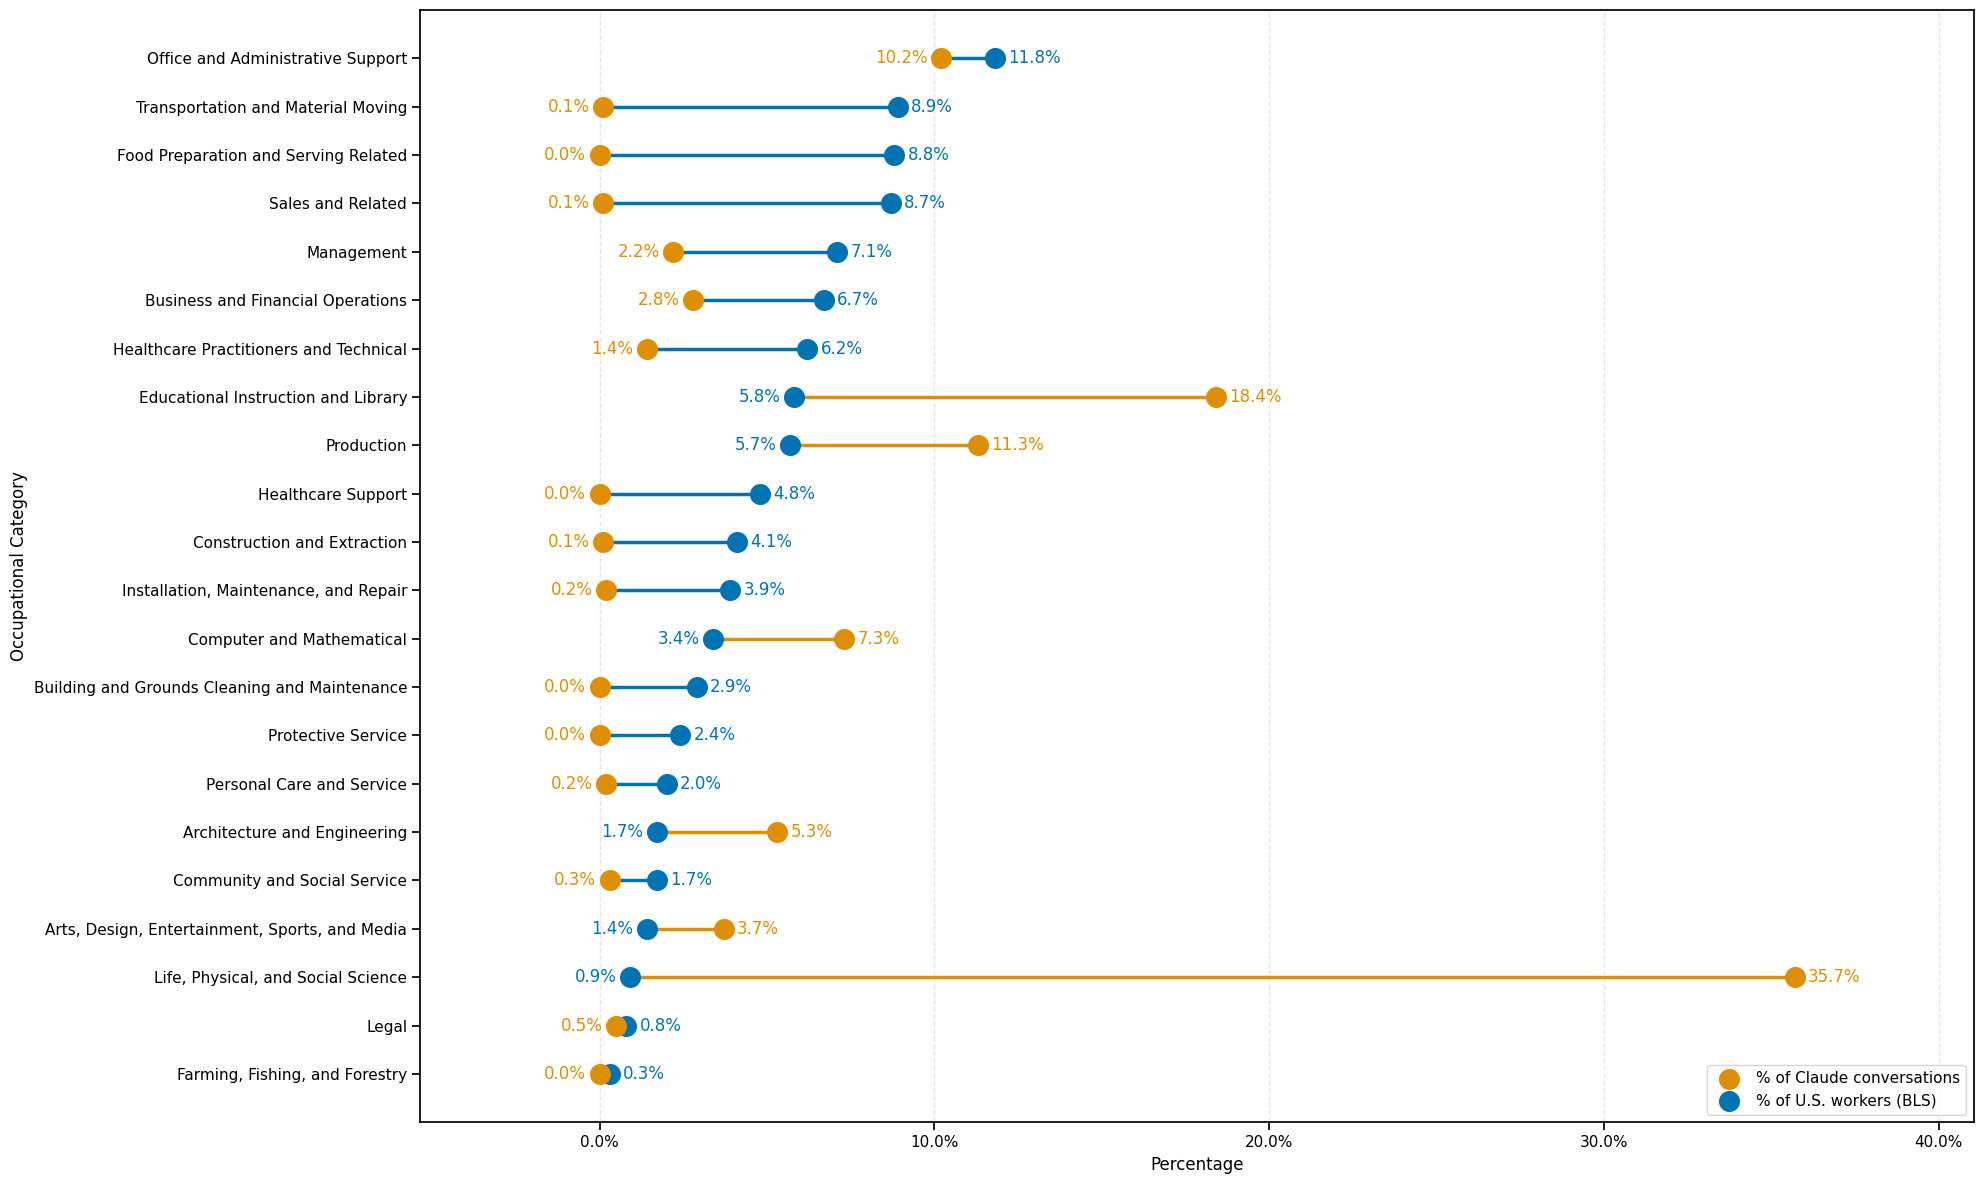

In [63]:
# Calculate percentages and setup data
plot_df = employment_df.copy()

def get_distribution(df, value_column):
   total = df[value_column].sum()
   return (df[value_column] / total * 100).round(1)

plot_df['bls_pct'] = get_distribution(plot_df, 'bls_distribution')
plot_df['claude_pct'] = get_distribution(plot_df, 'claude_distribution')
plot_df['clean_label'] = plot_df['SOC or O*NET-SOC 2019 Title'].str.replace(' Occupations', '')
plot_df['pct_difference'] = plot_df['claude_pct'] - plot_df['bls_pct']
plot_df = plot_df.sort_values('bls_pct', ascending=True)

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12))

# Set colors
claude_color = palette[1] 
bls_color = palette[0] 

# Create lines and circles
y_positions = range(len(plot_df))
for i, row in enumerate(plot_df.itertuples()):
   # Determine color based on which value is larger
   line_color = claude_color if row.claude_pct > row.bls_pct else bls_color
   
   # Draw the line between bls and claude percentages
   ax.plot([row.bls_pct, row.claude_pct], [i, i], 
           color=line_color, 
           linestyle='-', 
           linewidth=2.5,
           zorder=1)
   
   # Determine label positioning
   if row.claude_pct > row.bls_pct:
       bls_ha = 'right'
       claude_ha = 'left'
       bls_offset = -0.4
       claude_offset = 0.4
   else:
       bls_ha = 'left'
       claude_ha = 'right'
       bls_offset = 0.4
       claude_offset = -0.4

   # Plot BLS percentage
   ax.scatter([row.bls_pct], [i], 
              color=bls_color,
              s=200,
              zorder=2,
              label='% of U.S. workers (BLS)' if i == 0 else "")
   ax.text(row.bls_pct + bls_offset,
           i,
           f'{row.bls_pct:.1f}%',
           ha=bls_ha,
           va='center',
           color=bls_color)
   
   # Plot Claude's percentage
   ax.scatter([row.claude_pct], [i], 
              color=claude_color,
              s=200,
              zorder=2,
              label='% of Claude conversations' if i == 0 else "")
   ax.text(row.claude_pct + claude_offset,
           i,
           f'{row.claude_pct:.1f}%',
           ha=claude_ha,
           va='center',
           color=claude_color)

# Customize the plot
ax.set_xlabel('Percentage')
ax.set_ylabel('Occupational Category')

# Add percentage formatter to x-axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

# Set y-axis labels
ax.set_yticks(y_positions)
ax.set_yticklabels(plot_df['clean_label'])

# Add legend
handles, labels = ax.get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, loc='lower right', bbox_to_anchor=(1.0, 0.0))

# Adjust grid and layout
ax.grid(axis='x', linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Set axis limits with padding
max_val = max(plot_df['bls_pct'].max(), plot_df['claude_pct'].max())
min_val = min(plot_df['bls_pct'].min(), plot_df['claude_pct'].min())
padding = (max_val - min_val) * 0.15
ax.set_xlim(min_val - padding, max_val + padding)
ax.set_ylim(-1, len(plot_df))

# Adjust layout
plt.tight_layout()
plt.show()

In [64]:
df = pd.read_excel("../Task Statements.xlsx")
df

,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source
0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,95.0,08/2023,Incumbent
1,11-1011.00,Chief Executives,8824,"Confer with board members, organization offici...",Core,95.0,08/2023,Incumbent
2,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,95.0,08/2023,Incumbent
3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,94.0,08/2023,Incumbent
4,11-1011.00,Chief Executives,8834,Prepare or present reports concerning activiti...,Core,95.0,08/2023,Incumbent
...,...,...,...,...,...,...,...,...
18791,53-7121.00,"Tank Car, Truck, and Ship Loaders",12807,Unload cars containing liquids by connecting h...,Supplemental,85.0,08/2019,Incumbent
18792,53-7121.00,"Tank Car, Truck, and Ship Loaders",12804,"Clean interiors of tank cars or tank trucks, u...",Supplemental,85.0,08/2019,Incumbent
18793,53-7121.00,"Tank Car, Truck, and Ship Loaders",12803,Lower gauge rods into tanks or read meters to ...,Supplemental,85.0,08/2019,Incumbent
18794,53-7121.00,"Tank Car, Truck, and Ship Loaders",12805,Operate conveyors and equipment to transfer gr...,Supplemental,85.0,08/2019,Incumbent
